 # 1-) Independent t-test for two samples (AB Test)

It is used when trying to make a comparison between independent two group averages.

**These are the prerequisites for appplying this test**
 * 1-)Both samples should have normal distribution
 * 2-) The distribution of variance of the two samples should be similar (variance homogeneity)

**Otherwise we cannot apply the independent two sample tests**


**Business Application:** Test the succes of the machine learning model
 
 **Target:** 
   * An investment has been made in a machiene learning project.
   * After the project is implemented, the income generated by the new system is compared with the income generated by the old system.
   * It is wanted to test whether there is a statistically significant difference between these two incomes.
    
 **Details:**
   * The model has been developed and integrated into the website.
   * Site users are divided into two categories (Group A & Group B) according to a certain rule.
   * Group A is recommended products with my old system, and Group B gives new products with the new system.
    
    

**H0:** There **is no** significant difference between incomes after using the ML model in the system

**H1:** There **is**  significant difference between incomes after using the ML model in the system    

In [ ]:
# DATA TYPE 1

In [2]:
import pandas as pd
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25]) #the income generated by the old system.

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29]) #the income generated by the new system  after machine learning project is implemented.


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [3]:
# DATA TYPE 2

In [5]:
import numpy as np
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25]) #the incomes generated by the old system.

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])#the incomes generated by the new system  after machine learning project is implemented.

#A ve A's group
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "A"
A = pd.concat([A, GROUP_A], axis = 1)

#B ve B'nin Grubu
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "B"
B = pd.concat([B, GROUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["INCOME","GROUP"]
print(AB.head())
print(AB.tail())

   INCOME GROUP
0      30     A
1      27     A
2      21     A
3      27     A
4      29     A
    INCOME GROUP
25      33     B
26      26     B
27      32     B
28      33     B
29      29     B


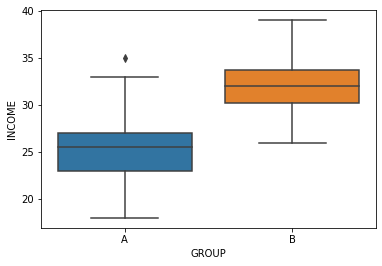

In [8]:
import seaborn as sns
sns.boxplot(x = "GROUP", y = "INCOME", data = AB);

In [9]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [10]:
AB.head()

,INCOME,GROUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


 ## Checking the  prerequisites for appplying this test



1-)Both samples should have normal distribution

2-) The distribution of variance of the two samples should be similar (variance homogeneity)

### 1-)Normal distribution

**Shapiro-Wilks Test**

**HO:** There **is no** statistically significant difference between the sample distribution and the theoretical normal distribution.

**H1:** There **is** a statistically significant difference between the sample distribution and the theoretical normal distribution. 

In [13]:
from scipy.stats import shapiro

In [14]:
shapiro(A_B["A"])

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

**pvalue=0.79627**


* Since the sample p-value is not less than 0.05, we cannot reject the H0 hypothesis.


* thus the incomes generated by the old system have normal distribution

In [16]:
shapiro(A_B["B"])

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

  **pvalue=0.24584** 
    
* Since the sample p-value is not less than 0.05, we cannot reject the H0 hypothesis.


* Thus the incomes generated by the new system  after machine learning project is implemented has normal distribution

### 2-)Variance homogeneity

**H0:** The variances of both samples **are** homogeneous


**H1:** The variances of both samples **are not** homogeneous

In [19]:
import scipy.stats as stats
stats.levene(A_B["A"], A_B["B"])



LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

* Since the sample p-value is not less than 0.05, we cannot reject the H0 hypothesis.


* Thus the variances of both samples are homogeneous

## Hypothesis Test

**H0:** There **is no** significant difference between incomes after using the ML model in the system

**H1:** There **is**  significant difference between incomes after using the ML model in the system 

In [20]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

**pvalue=2.6233215605475075e-09**

* H0 hypothesis is rejected because the p-value is less than 0.05.


* Thus there is significant difference between incomes after using the ML model in the system

 # 2-)Non-Parametric Independent t-test for two samples (AB Test)

* If the normal distribution and variance homogeneity as prerequisites **are not satisfied**, we should apply Non-Parametric Independent t-test for two samples (AB Test) on the samples. 

In [21]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [22]:
test_statistics, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('Test Statistics = %.4f, p-value = %.4f' % (test_statistics, pvalue))

Test Statistics = 89.5000, p-value = 0.0000
